In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [3]:
import os
os.chdir('../IConNet/')
os.getcwd()

'/home/linh/projects/IConNet'

In [6]:
import librosa

In [4]:
from einops import reduce, rearrange, repeat
from torch import Tensor

In [5]:
a = torch.zeros(512)

In [7]:
librosa.hz_to_note(430)

'A4'

In [8]:
librosa.note_to_hz('G4')

391.99543598174927

In [11]:
notes = ['C3', 'G4', 'A4']
def get_fft_point(x_freq: float, n_fft=512, sr=16000):
    """
    fft mesh: [0, n_fft] -> frequency [0, sr/2] Hz
    """
    delta_hz = sr/2/n_fft
    return int(x_freq / delta_hz)

freqs = [librosa.note_to_hz(n) for n in notes]
fft_points = [get_fft_point(f) for f in freqs]

In [12]:
fft_points

[8, 25, 28]

In [17]:
a.scatter_(-1, torch.tensor(fft_points, dtype=torch.long), 1)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [46]:
from IConNet.acov.audio_viz import play_and_visualize

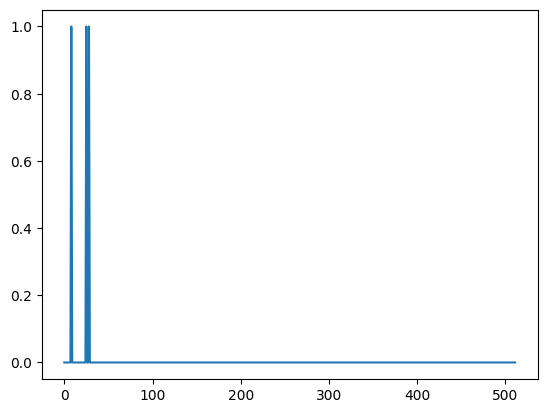

In [19]:
plt.plot(a)

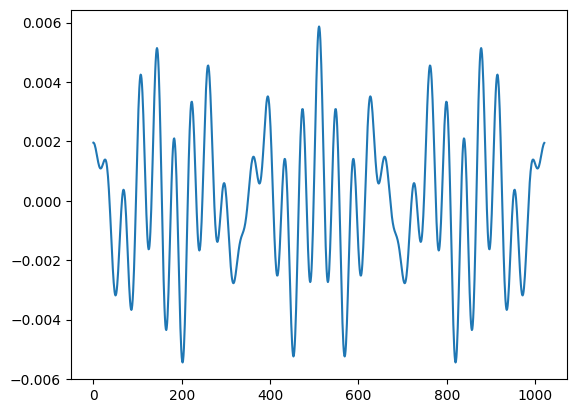

In [22]:
a_freq = torch.fft.ifftshift(torch.fft.irfft(a))
plt.plot(a_freq)

In [23]:
b_freqs = [130, 1800, 2500]
b_fft_points = [get_fft_point(f) for f in b_freqs]
b = torch.zeros(512).scatter_(
    0, torch.tensor(b_fft_points, dtype=torch.long), 1)

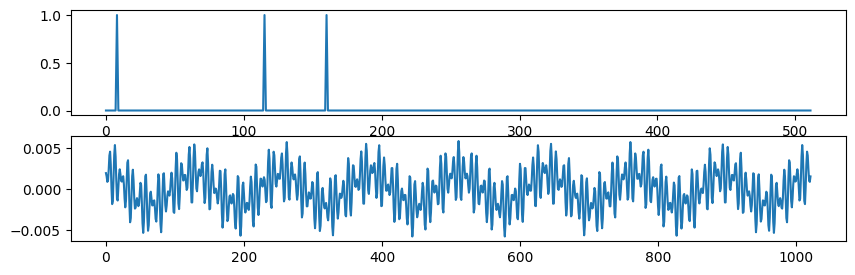

In [26]:
b_freq = torch.fft.ifftshift(torch.fft.irfft(b))

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(b)
axes[1].plot(b_freq)

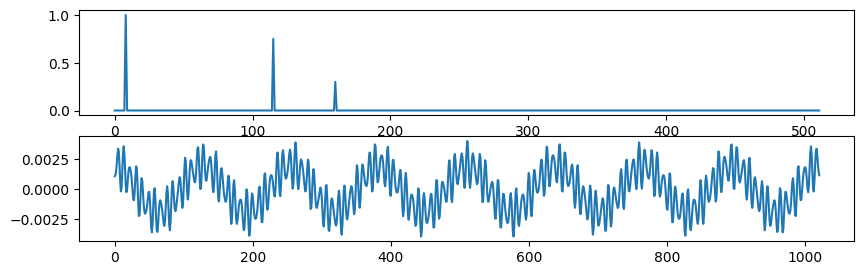

In [32]:
b_freqs = [130, 1800, 2500]
b_fft_points = [get_fft_point(f) for f in b_freqs]
b = torch.zeros(512).scatter_(
    0, torch.tensor(b_fft_points, dtype=torch.long), 
    torch.tensor([1., 0.75, 0.3]))
b_freq = torch.fft.ifftshift(torch.fft.irfft(b))

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(b)
axes[1].plot(b_freq)

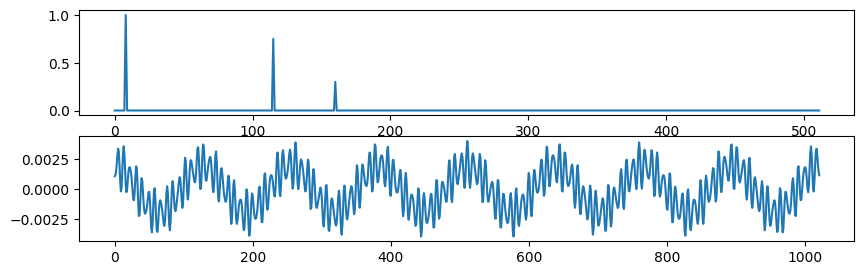

In [33]:
b_freqs = [130, 131, 1800, 1801, 2500, 2501]
b_fft_points = [get_fft_point(f) for f in b_freqs]
b = torch.zeros(512).scatter_(
    0, torch.tensor(b_fft_points, dtype=torch.long), 
    torch.tensor([1., 1., 0.75, 0.75, 0.3, 0.3]))
b_freq = torch.fft.ifftshift(torch.fft.irfft(b))

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(b)
axes[1].plot(b_freq)

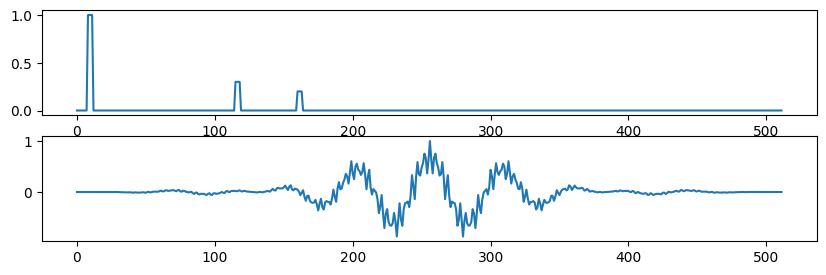

In [53]:
b_freqs = [130, 1800, 2500]
b_freqs_responses = torch.tensor([1., 0.3, 0.2])
b_fft_points = torch.tensor(
    [get_fft_point(f) for f in b_freqs], dtype=torch.long)
b = torch.zeros(512)
for i in range(4):
    b.scatter_(0, b_fft_points+i, b_freqs_responses)
b_freq = torch.fft.ifftshift(torch.fft.irfft(b, n=512))
b_freq = b_freq * torch.hann_window(512)
b_freq = b_freq / b_freq.amax()

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(b)
axes[1].plot(b_freq)

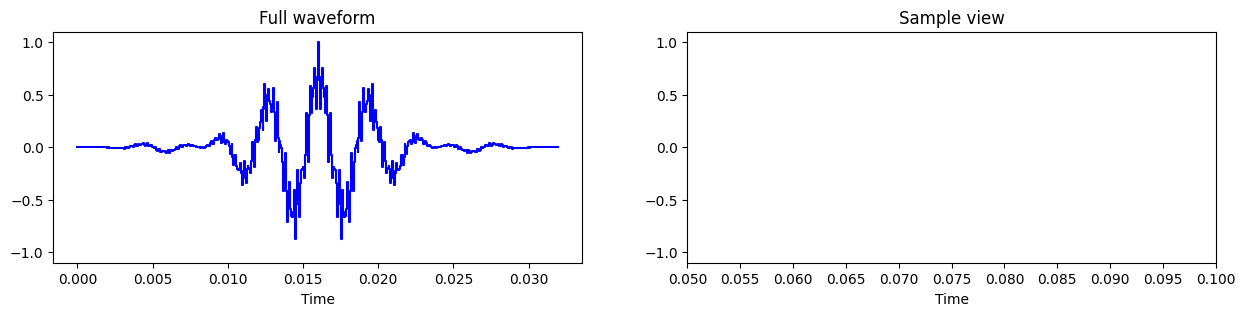

In [54]:
play_and_visualize(y=b_freq.numpy(), sr=16000)

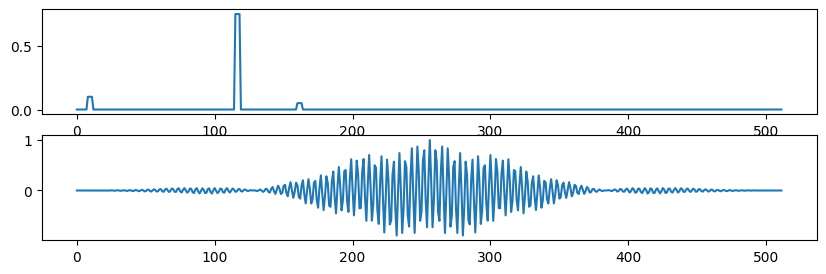

In [55]:
b_freqs = [130, 1800, 2500]
b_freqs_responses = torch.tensor([0.1, 0.75, 0.05])
b_fft_points = torch.tensor(
    [get_fft_point(f) for f in b_freqs], dtype=torch.long)
b = torch.zeros(512)
for i in range(4):
    b.scatter_(0, b_fft_points+i, b_freqs_responses)
b_freq = torch.fft.ifftshift(torch.fft.irfft(b, n=512))
b_freq = b_freq * torch.hann_window(512)
b_freq = b_freq / b_freq.amax()

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(b)
axes[1].plot(b_freq)

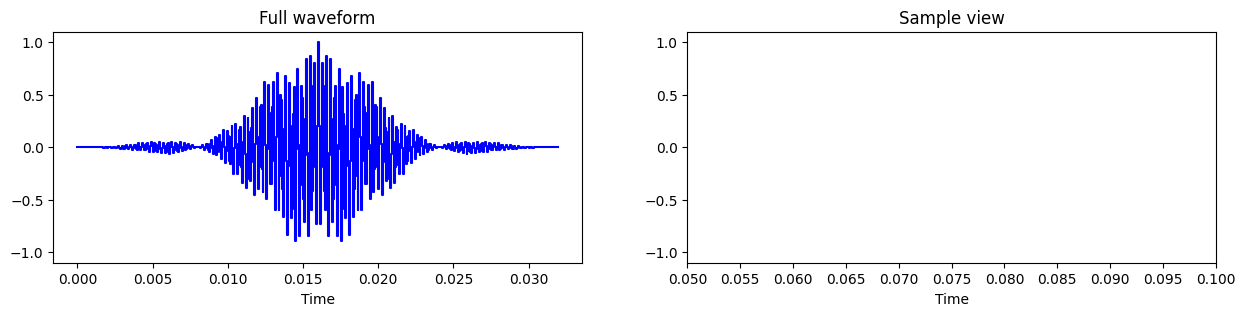

In [56]:
play_and_visualize(y=b_freq.numpy(), sr=16000)

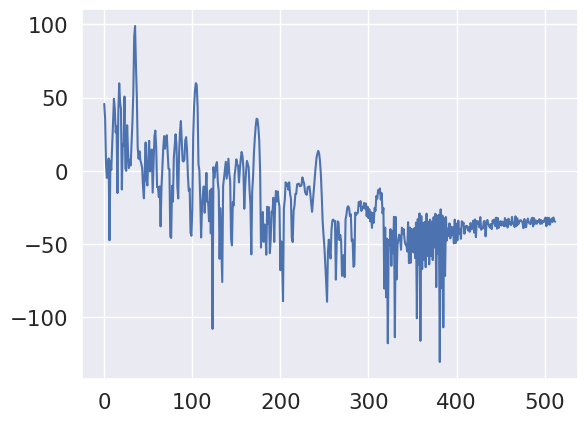

In [163]:
# plt.plot(emb_44_fft2_db)

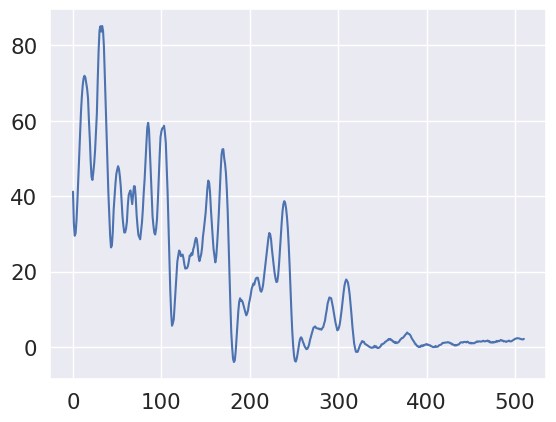

In [173]:
# scb_7
# emb_44_fft2_db_min = emb_44_fft2_db[400:].mean()
# emb_44_fft2_db -= emb_44_fft2_db_min
# emb_44_fft2_db = torch.clamp(emb_44_fft2_db, min=0)
# plt.plot(scipy.signal.savgol_filter(emb_44_fft2_db[2:], 30, 5))

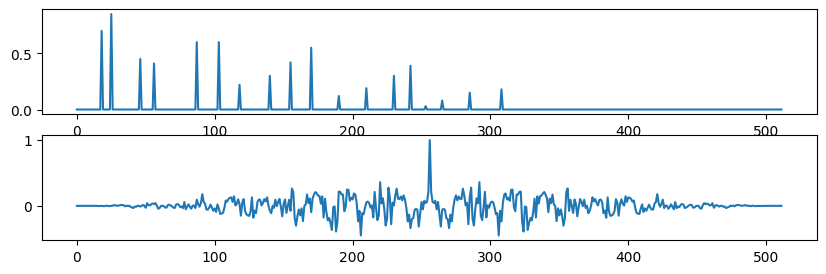

In [57]:
c_fft_points = [18, 25, 46, 56, 87, 103, 
          118, 140, 155, 170, 190,
          210, 230, 242, 253, 265, 285, 308]
c_freqs_responses = torch.tensor(
        [0.7, 0.85, 0.45, 0.41, 0.6, 0.6,
        0.22, 0.30, 0.42, 0.55, 0.12,
        0.19, 0.3, 0.39, 0.03, 0.08, 0.15, 0.18])
c_fft_points = torch.tensor(
    c_fft_points, dtype=torch.long)

c = torch.zeros(512)
for i in range(4):
    c.scatter_(0, c_fft_points, c_freqs_responses)
c_freq = torch.fft.ifftshift(torch.fft.irfft(c, n=512))
c_freq = c_freq * torch.hann_window(512)
c_freq = c_freq / c_freq.amax()

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(c)
axes[1].plot(c_freq)

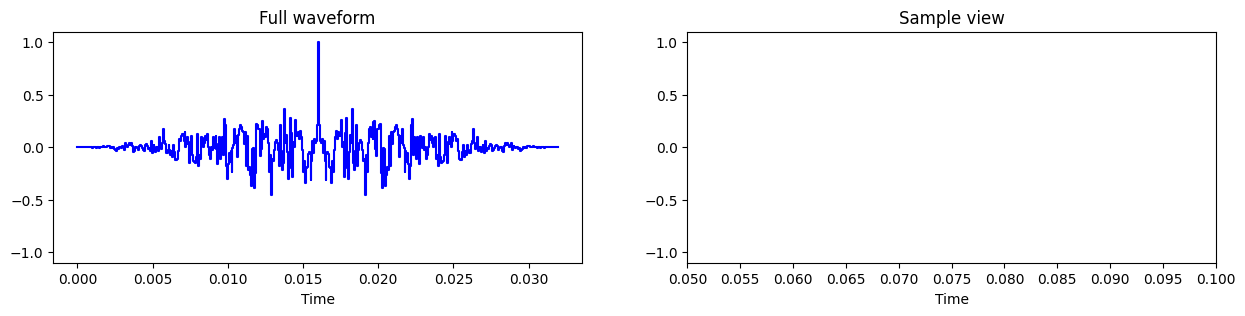

In [58]:
play_and_visualize(y=c_freq.numpy(), sr=16000)

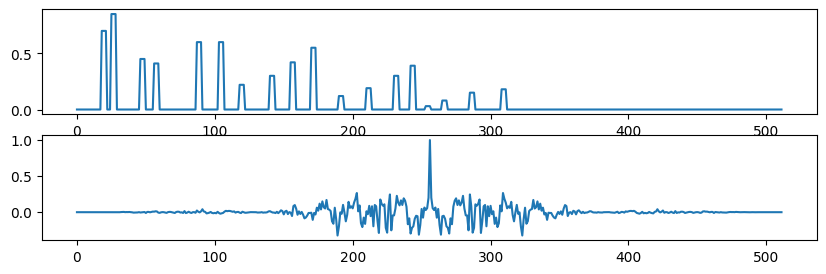

In [59]:
c_fft_points = [18, 25, 46, 56, 87, 103, 
          118, 140, 155, 170, 190,
          210, 230, 242, 253, 265, 285, 308]
c_freqs_responses = torch.tensor(
        [0.7, 0.85, 0.45, 0.41, 0.6, 0.6,
        0.22, 0.30, 0.42, 0.55, 0.12,
        0.19, 0.3, 0.39, 0.03, 0.08, 0.15, 0.18])
c_fft_points = torch.tensor(
    c_fft_points, dtype=torch.long)

c = torch.zeros(512)
for i in range(4):
    c.scatter_(0, c_fft_points+i, c_freqs_responses)
c_freq = torch.fft.ifftshift(torch.fft.irfft(c, n=512))
c_freq = c_freq * torch.hann_window(512)
c_freq = c_freq / c_freq.amax()

fit, axes = plt.subplots(2, 1, figsize=(10,3))
axes[0].plot(c)
axes[1].plot(c_freq)

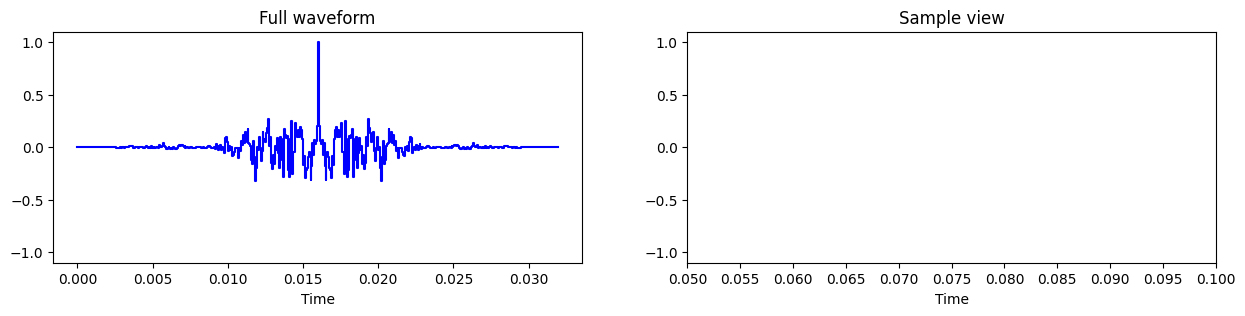

In [60]:
play_and_visualize(y=c_freq.numpy(), sr=16000)

pitch: 484.375 Hz - Note: B4
tensor(484.3750)


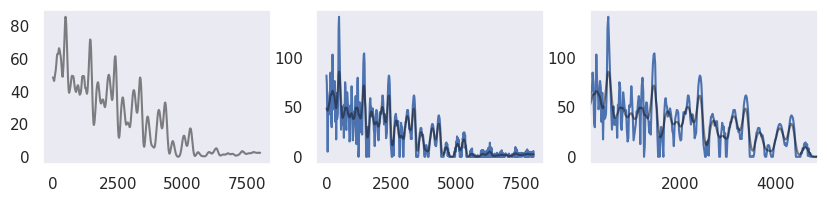

In [596]:
# 32, 284, 182
emb3_182_pitch = compute_pitch(emb_data3[182])
print(f"pitch: {emb3_182_pitch} Hz - Note: {librosa.hz_to_note(emb3_182_pitch)}")
emb3_182_fft2 = torch.fft.rfft(emb_data3[182], n=1024).type(torch.float)**2
emb3_182_fft2_db = magnitude_to_db(emb3_182_fft2[:512])
emb3_182_fft2_db -= emb3_182_fft2_db[400:].mean()
emb3_182_fft2_db = torch.clamp(emb3_182_fft2_db, min=0)
emb3_182_fft2_db_smooth = F.avg_pool1d(
    F.pad(F.avg_pool1d(
        F.pad(emb3_182_fft2_db.unsqueeze(dim=0), (3,3), 'reflect'), 
        kernel_size=7, stride=1), (3,3), 'reflect'),
    kernel_size=7, stride=1)[0][:512]
print(torch.argmax(emb3_182_fft2_db_smooth)*16000/1024)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
freq_x = np.linspace(0, 16000/2, 512)
ax1.plot(freq_x, emb3_182_fft2_db_smooth, color='#0f0f0f80')
ax2.plot(freq_x, emb3_182_fft2_db)
ax2.plot(freq_x, emb3_182_fft2_db_smooth, color='#0f0f0f80')
ax3.plot(freq_x, emb3_182_fft2_db)
ax3.set_xlim(freq_x[6],freq_x[-200])
ax3.plot(freq_x, emb3_182_fft2_db_smooth, color='#0f0f0f80')

pitch: 265.625 Hz - Note: C4
tensor(265.6250)


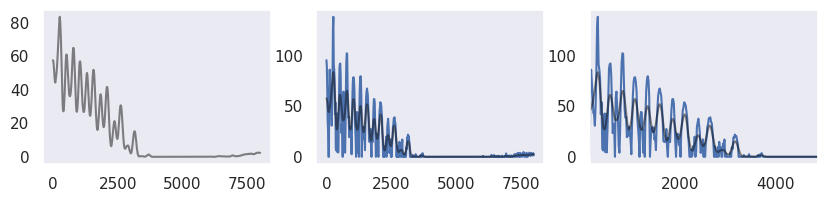

In [602]:
# 27, 194, 174,  13
emb3_13_pitch = compute_pitch(emb_data3[13])
print(f"pitch: {emb3_13_pitch} Hz - Note: {librosa.hz_to_note(emb3_13_pitch)}")
emb3_13_fft2 = torch.fft.rfft(emb_data3[13], n=1024).type(torch.float)**2
emb3_13_fft2_db = magnitude_to_db(emb3_13_fft2[:512])
emb3_13_fft2_db -= emb3_13_fft2_db[400:].mean()
emb3_13_fft2_db = torch.clamp(emb3_13_fft2_db, min=0)
emb3_13_fft2_db_smooth = F.avg_pool1d(
    F.pad(F.avg_pool1d(
        F.pad(emb3_13_fft2_db.unsqueeze(dim=0), (3,3), 'reflect'), 
        kernel_size=7, stride=1), (3,3), 'reflect'),
    kernel_size=7, stride=1)[0][:512]
print(torch.argmax(emb3_13_fft2_db_smooth)*16000/1024)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
freq_x = np.linspace(0, 16000/2, 512)
ax1.plot(freq_x, emb3_13_fft2_db_smooth, color='#0f0f0f80')
ax2.plot(freq_x, emb3_13_fft2_db)
ax2.plot(freq_x, emb3_13_fft2_db_smooth, color='#0f0f0f80')
ax3.plot(freq_x, emb3_13_fft2_db)
ax3.set_xlim(freq_x[6],freq_x[-200])
ax3.plot(freq_x, emb3_13_fft2_db_smooth, color='#0f0f0f80')

In [80]:
scb7_audio_dir = '../scb7_models/scb7/ravdess_audio/'

In [63]:
from IConNet.firconv.signal import magnitude_to_db
from IConNet.acov.audio_viz import compute_pitch, display_audio_list

In [76]:
def embedding_analysis(
    embedding, n_fft=512, sr=16000, 
    fmax=6000, fmin=30
):
    max_freq = sr/2
    freq_delta = max_freq/n_fft
    fmax_fft = int(fmax / freq_delta) + 1
    fmin_fft = int(fmin / freq_delta)
    
    pitch = compute_pitch(embedding)
    note = librosa.hz_to_note(pitch)
    print(f"pitch: {pitch} Hz - Note: {note}")
    fft = torch.fft.rfft(embedding, n=n_fft*2).type(torch.float)**2
    fft_db = fft[:n_fft] ##magnitude_to_db(fft[:n_fft])
    # fft_db -= fft_db[fmax_fft:].mean()
    # fft_db = torch.clamp(fft_db, min=0)
    fft_db_smooth = F.avg_pool1d(
        F.pad(F.avg_pool1d(
            F.pad(fft_db.unsqueeze(dim=0), (3,3), 'reflect'), 
            kernel_size=7, stride=1), (3,3), 'reflect'),
        kernel_size=7, stride=1)[0][:n_fft]

    print(torch.argmax(fft_db_smooth)*freq_delta)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
    freq_x = np.linspace(0, max_freq, n_fft)
    ax1.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax2.plot(freq_x, fft_db)
    ax2.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax3.plot(freq_x, fft_db)
    ax3.set_xlim(freq_x[fmin_fft],freq_x[-fmax_fft])
    ax3.plot(freq_x, fft_db_smooth, color='#0f0f0f80')

pitch: 812.5 Hz - Note: G♯5
tensor(812.5000)


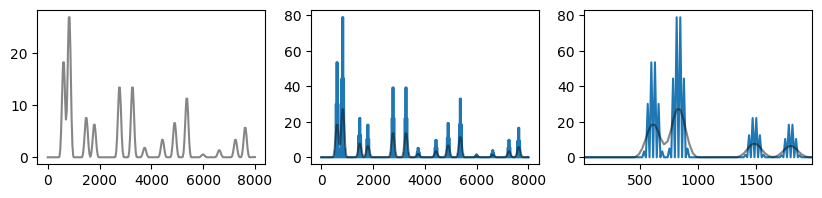

In [77]:
embedding_analysis(c_freq)

In [82]:
import soundfile as sf

In [84]:
import glob

In [85]:
glob.glob(f'{scb7_audio_dir}*.wav')

['../scb7_models/scb7/ravdess_audio/emb_148.wav',
 '../scb7_models/scb7/ravdess_audio/emb_169_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_228_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_52_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_60_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_201_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_252_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_252.wav',
 '../scb7_models/scb7/ravdess_audio/emb_60.wav',
 '../scb7_models/scb7/ravdess_audio/emb_190_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_44_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_148_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_203_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_23_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_44.wav',
 '../scb7_models/scb7/ravdess_audio/emb_225_iemocap4k.wav',
 '../scb7_models/scb7/ravdess_audio/emb_346_iemocap4k.wav',
 '../scb7_models/scb7/ravd

In [86]:
y, sr = sf.read(f'{scb7_audio_dir}emb_44.wav')
print(sr, y.shape)

16000 (1023,)


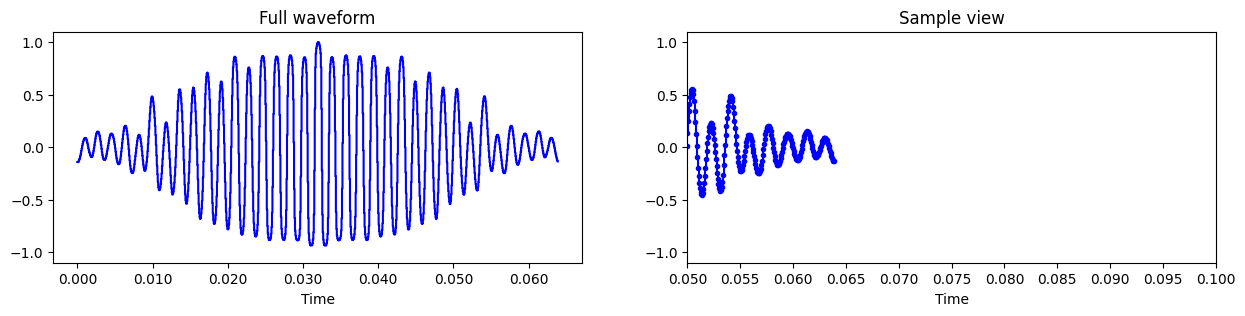

In [87]:
play_and_visualize(y=y, sr=16000)

pitch: 546.875 Hz - Note: C♯5
tensor(546.8750)


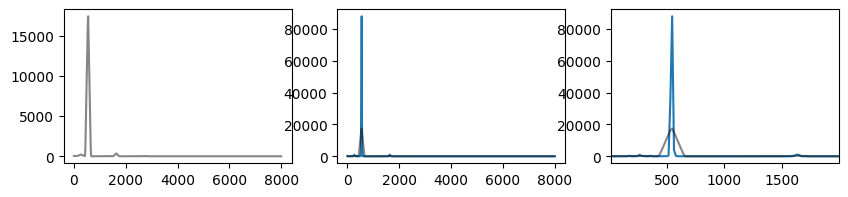

In [89]:
embedding_analysis(torch.tensor(y))

In [100]:
def embedding_analysis(
    embedding, n_fft=512, sr=16000, 
    fmax=6000, fmin=30
):
    max_freq = sr/2
    freq_delta = max_freq/n_fft
    fmax_fft = int(fmax / freq_delta) + 1
    fmin_fft = int(fmin / freq_delta)
    
    pitch = compute_pitch(embedding)
    note = librosa.hz_to_note(pitch)
    print(f"pitch: {pitch} Hz - Note: {note}")
    fft = torch.fft.rfft(embedding, n=n_fft*2).type(torch.float).real**2
    fft_db = magnitude_to_db(fft[:n_fft])
    fft_db -= fft_db[fmax_fft:].mean()
    fft_db = torch.clamp(fft_db, min=0)

    smooth_fn = lambda x: F.avg_pool1d(
        F.pad(x, (3,3), 'reflect'), kernel_size=7, stride=1)
    fft_db_smooth = smooth_fn(smooth_fn(
        fft_db.unsqueeze(dim=0)))[0][:n_fft]

    pitch_after_smooth = torch.argmax(fft_db_smooth)*freq_delta
    assert pitch_after_smooth == pitch
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
    freq_x = np.linspace(0, max_freq, n_fft)
    ax1.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax2.plot(freq_x, fft_db)
    ax2.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax3.plot(freq_x, fft_db)
    ax3.set_xlim(freq_x[fmin_fft],freq_x[fmax_fft])
    ax3.plot(freq_x, fft_db_smooth, color='#0f0f0f80')


pitch: 546.875 Hz - Note: C♯5


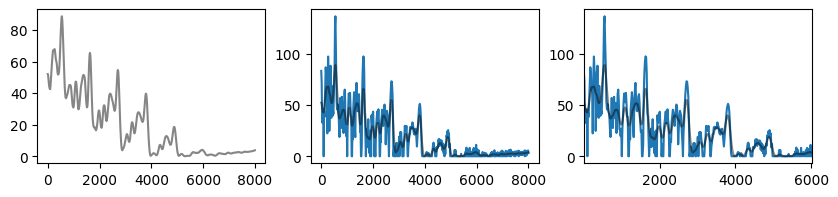

In [101]:
embedding_analysis(torch.tensor(y))

In [104]:
from IConNet.nn.activation import nl_relu, gumbel_softmax

In [140]:
def embedding_analysis2(
    embedding, n_fft=512, sr=16000, 
    fmax=6000, fmin=30
):
    max_freq = sr/2
    freq_delta = max_freq/n_fft
    fmax_fft = int(fmax / freq_delta) + 1
    fmin_fft = int(fmin / freq_delta)
    
    pitch = compute_pitch(embedding)
    note = librosa.hz_to_note(pitch)
    print(f"pitch: {pitch} Hz - Note: {note}")

    eps = torch.finfo(embedding.dtype).eps
    normalize_fn = lambda x: x / torch.clamp(
        x.amax(dim=-1, keepdim=True), min=eps)
    
    fft_db = nl_relu(torch.fft.rfft(
        embedding, n=n_fft*2).real**2)[:n_fft]
    fft_db = normalize_fn(fft_db)

    smooth_fn = lambda x: F.avg_pool1d(
        F.pad(x, (3,3), 'reflect'), kernel_size=7, stride=1)
    fft_db_smooth = smooth_fn(smooth_fn(
        fft_db.unsqueeze(dim=0)))[0][:n_fft]

    mfcc = torch.fft.rfft(fft_db, n=n_fft).real[2:40]
    mfcc = normalize_fn(mfcc)
    
    mfcc_smooth = torch.fft.rfft(fft_db_smooth, n=n_fft).real[2:40]
    mfcc_smooth = normalize_fn(mfcc_smooth)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
    freq_x = np.linspace(0, max_freq, n_fft)
    ax1.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax2.plot(freq_x, fft_db)
    ax2.plot(freq_x, fft_db_smooth, color='#0f0f0f80')
    ax3.plot(mfcc)
    ax3.plot(mfcc_smooth, color='#0f0f0f80')

    pitch_after_smooth = torch.argmax(fft_db_smooth)*freq_delta
    assert pitch_after_smooth == pitch, f"{pitch_after_smooth}"


pitch: 546.875 Hz - Note: C♯5


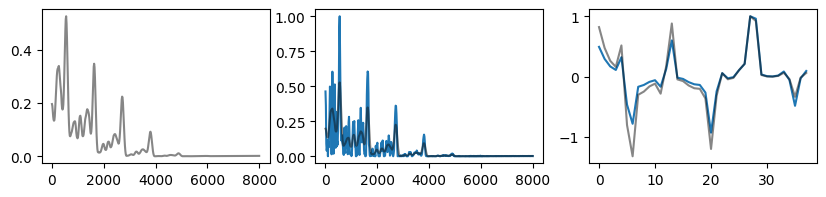

In [136]:
embedding_analysis2(torch.tensor(y))


In [137]:
y1, sr = sf.read(f'{scb7_audio_dir}emb_44_iemocap4k.wav')
print(sr, y1.shape)

16000 (1023,)


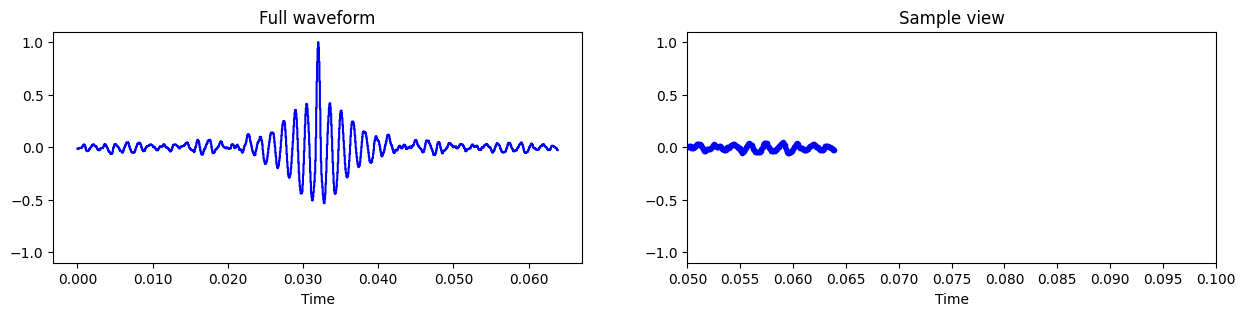

In [138]:
play_and_visualize(y=y1, sr=16000)

pitch: 625.0 Hz - Note: D♯5


AssertionError: 656.25

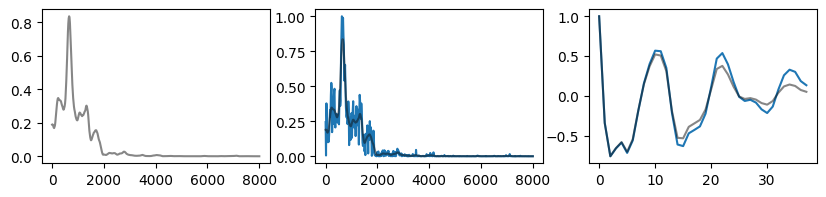

In [141]:
embedding_analysis2(torch.tensor(y1))

In [142]:
librosa.hz_to_note(656.25)

'E5'

16000 (1023,)



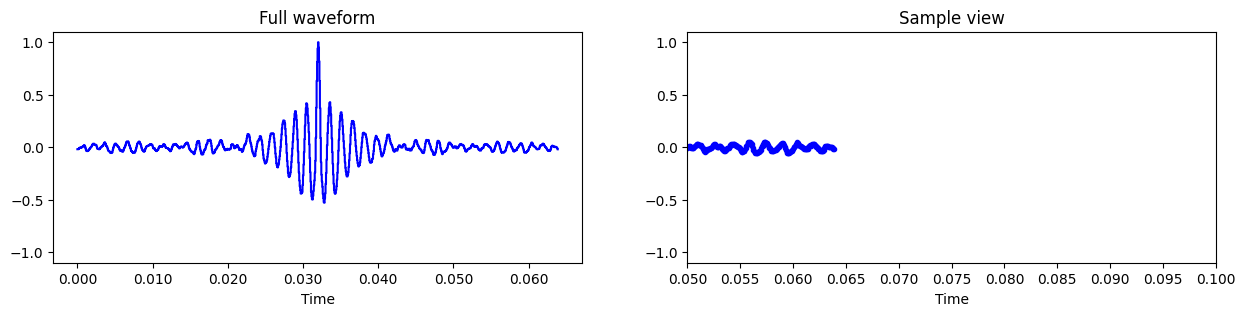

pitch: 625.0 Hz - Note: D♯5


AssertionError: 656.25

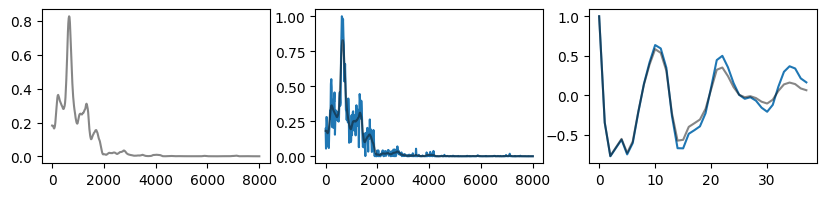

In [143]:
y60, sr = sf.read(f'{scb7_audio_dir}emb_60.wav')
print(sr, y60.shape)
play_and_visualize(y=y60, sr=16000)
embedding_analysis2(torch.tensor(y60))

16000 (1023,)



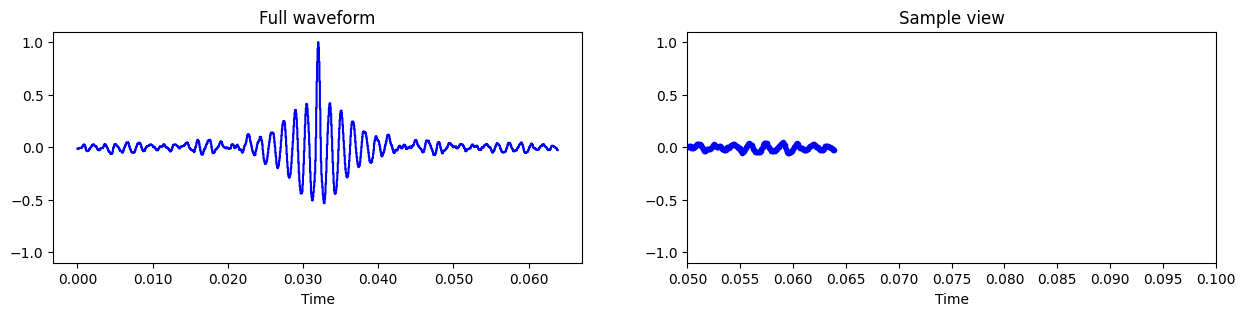

pitch: 625.0 Hz - Note: D♯5


AssertionError: 656.25

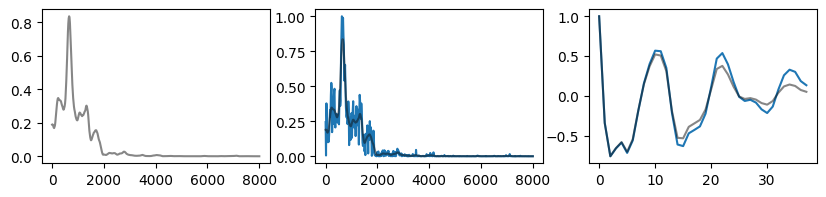

In [144]:
y60_1, sr = sf.read(f'{scb7_audio_dir}emb_60_iemocap4k.wav')
print(sr, y60_1.shape)
play_and_visualize(y=y60_1, sr=16000)
embedding_analysis2(torch.tensor(y60_1))

16000 (1023,)



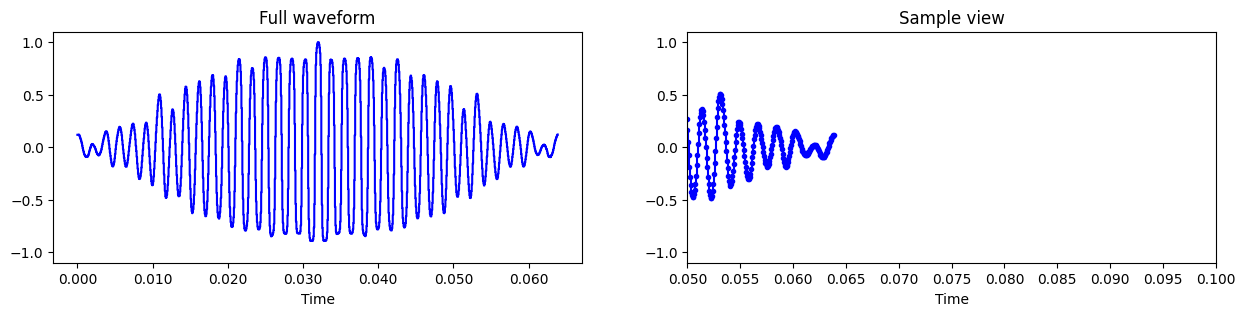

pitch: 562.5 Hz - Note: C♯5


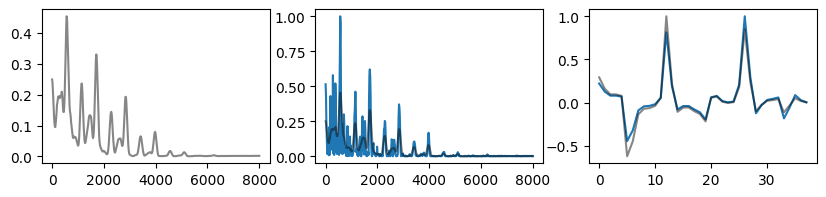

In [145]:
y252, sr = sf.read(f'{scb7_audio_dir}emb_252.wav')
print(sr, y252.shape)
play_and_visualize(y=y252, sr=16000)
embedding_analysis2(torch.tensor(y252))

16000 (1023,)



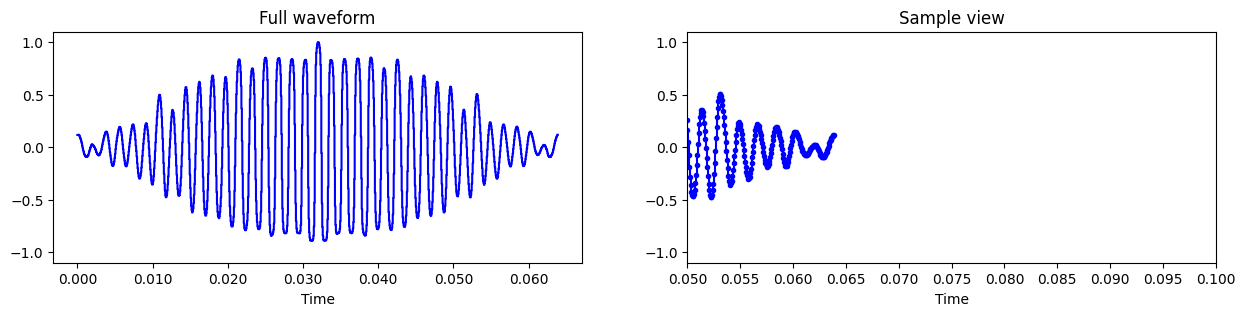

pitch: 562.5 Hz - Note: C♯5


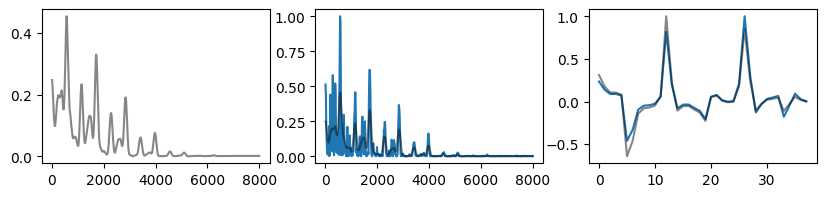

In [151]:
y252_1, sr = sf.read(f'{scb7_audio_dir}emb_252_iemocap4k.wav')
print(sr, y252_1.shape)
p = play_and_visualize(y=y252_1, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y252_1))

In [147]:
import IPython.display as ipd

16000 (1023,)



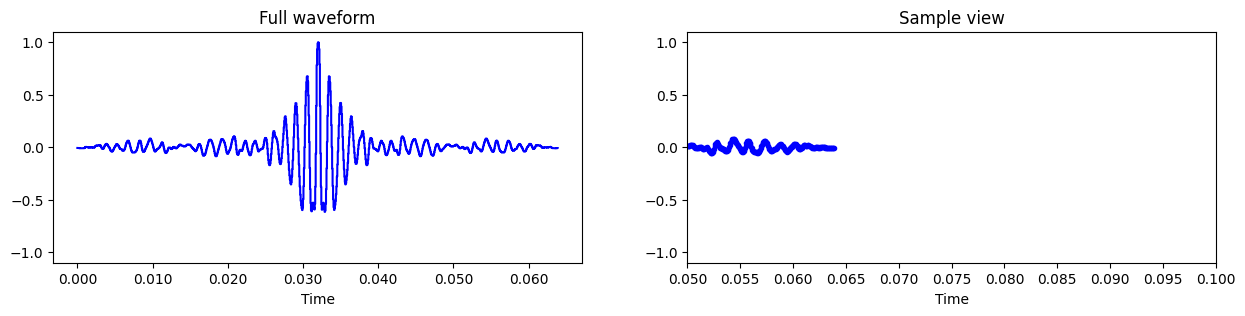

pitch: 703.125 Hz - Note: F5


AssertionError: 671.875

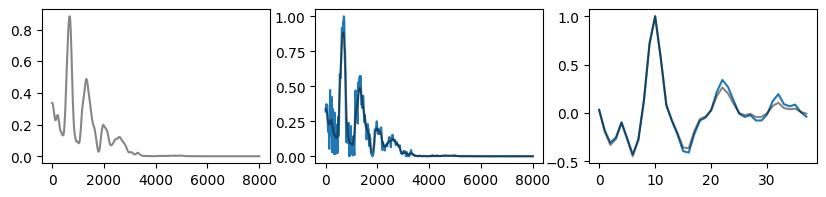

In [148]:
y346, sr = sf.read(f'{scb7_audio_dir}emb_346.wav')
print(sr, y346.shape)
p = play_and_visualize(y=y346, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y346))

16000 (1023,)



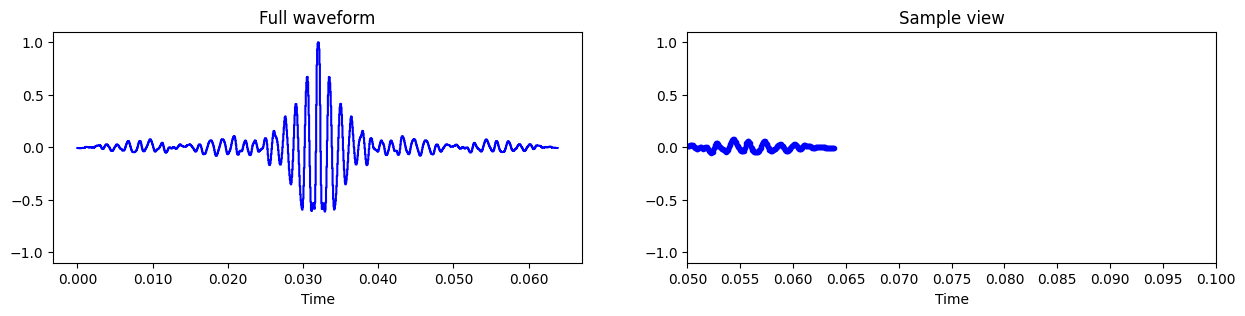

pitch: 703.125 Hz - Note: F5


AssertionError: 671.875

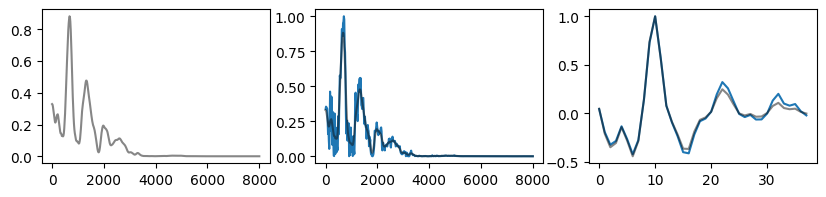

In [150]:
y346_1, sr = sf.read(f'{scb7_audio_dir}emb_346_iemocap4k.wav')
print(sr, y346_1.shape)
p = play_and_visualize(y=y346_1, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y346_1))

16000 (1023,)



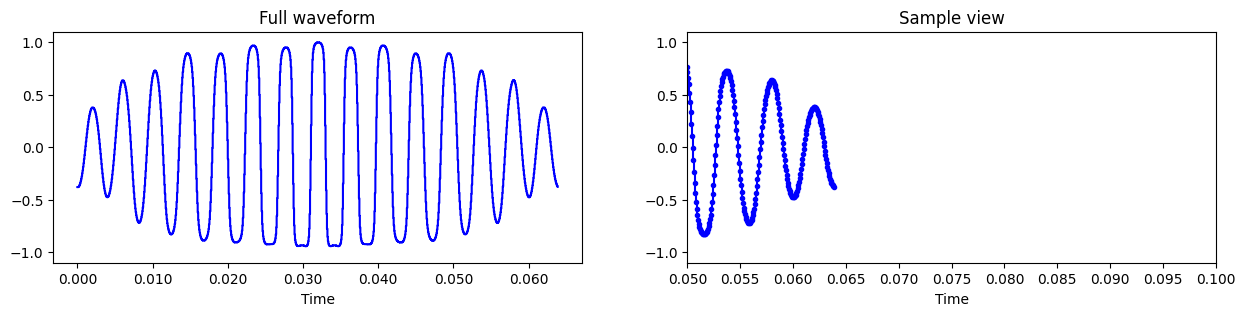

pitch: 234.375 Hz - Note: A♯3


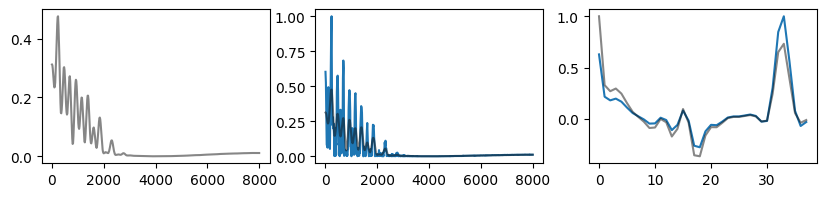

In [153]:
y148, sr = sf.read(f'{scb7_audio_dir}emb_148.wav')
print(sr, y148.shape)
p = play_and_visualize(y=y148, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y148))

16000 (1023,)



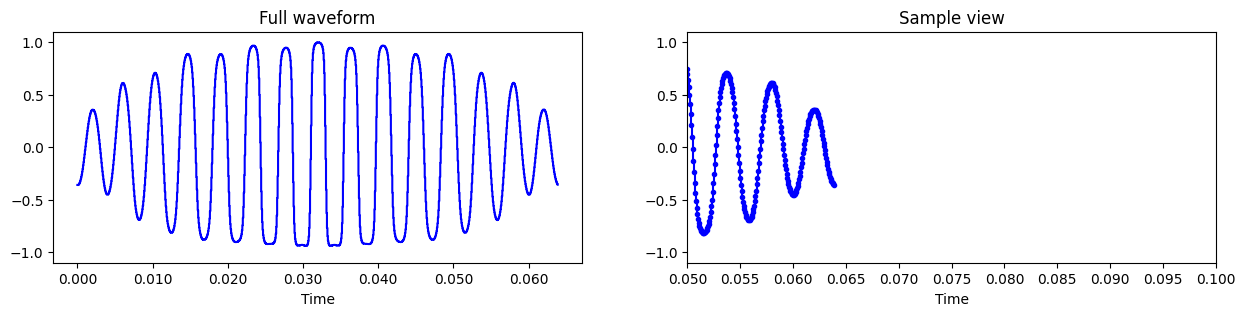

pitch: 234.375 Hz - Note: A♯3


AssertionError: 218.75

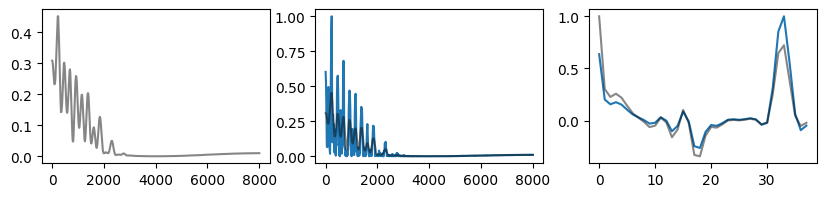

In [154]:
y148_1, sr = sf.read(f'{scb7_audio_dir}emb_148_iemocap4k.wav')
print(sr, y148_1.shape)
p = play_and_visualize(y=y148_1, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y148_1))

16000 (1023,)



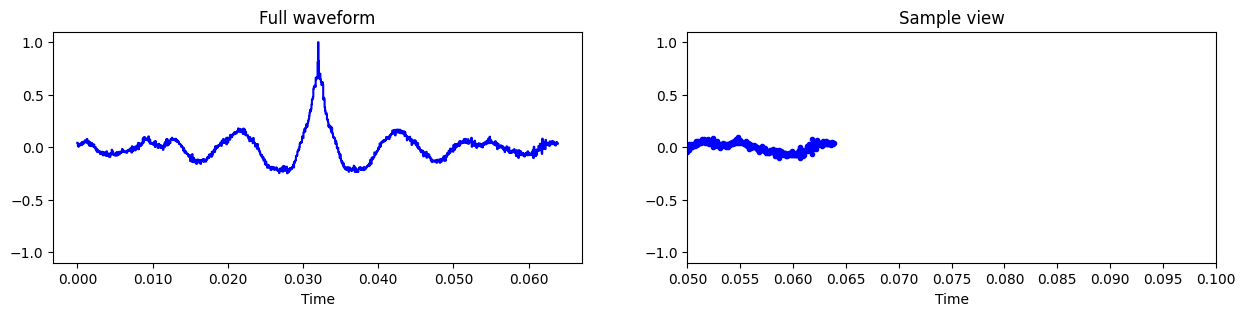

pitch: 93.75 Hz - Note: F♯2


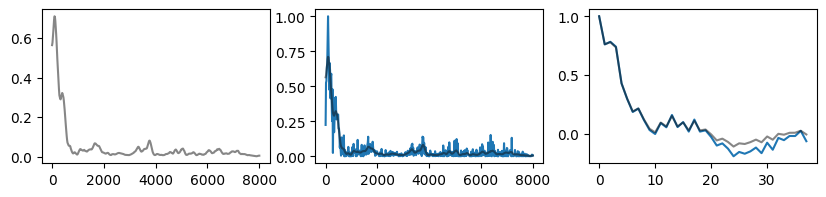

In [152]:
y23_1, sr = sf.read(f'{scb7_audio_dir}emb_23_iemocap4k.wav')
print(sr, y23_1.shape)
p = play_and_visualize(y=y23_1, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(y23_1))

16000 (1023,)



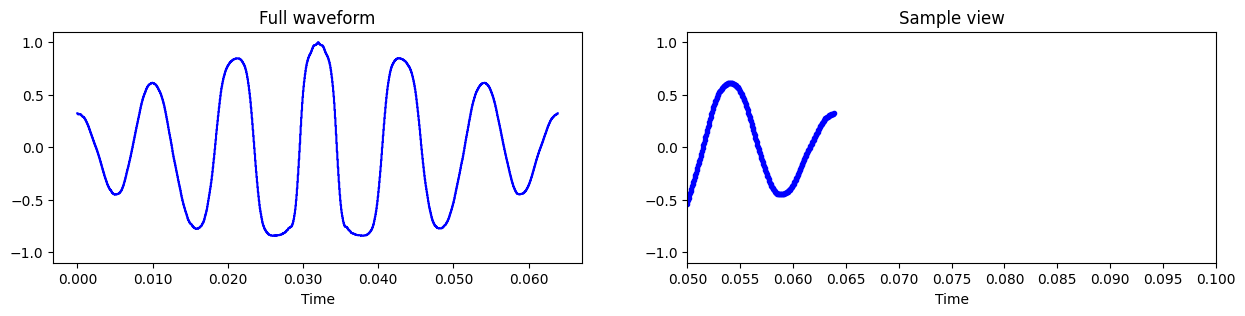

pitch: 93.75 Hz - Note: F♯2


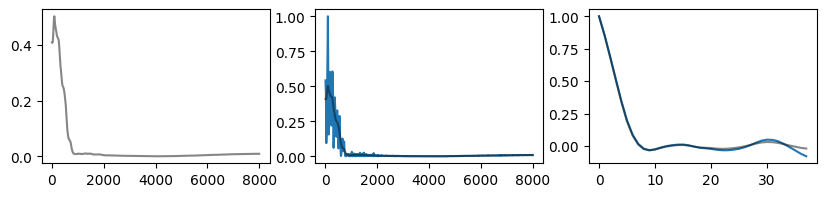

In [155]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_190_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



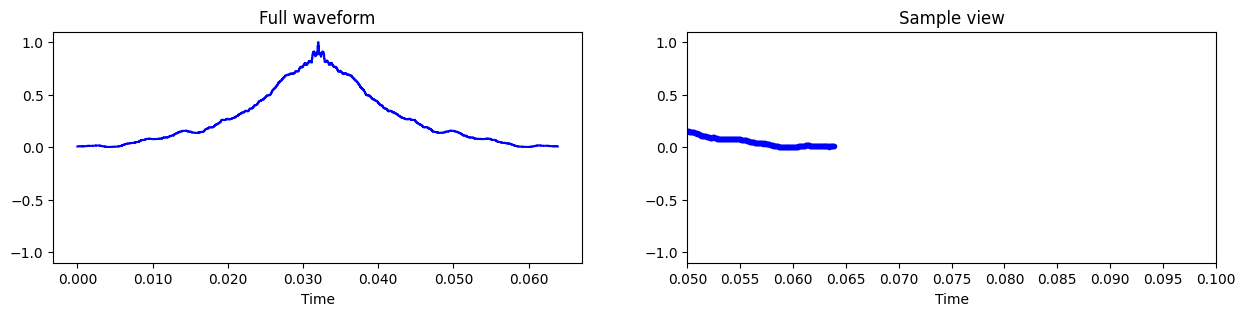

OverflowError: cannot convert float infinity to integer

In [156]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_201_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



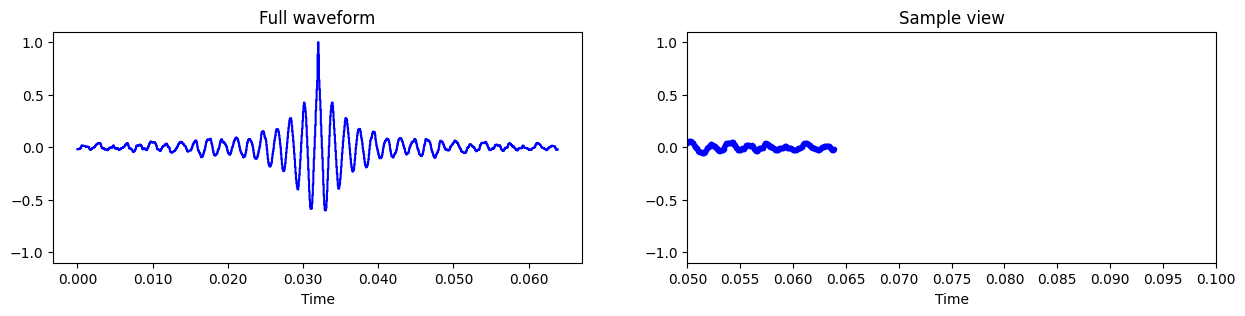

pitch: 546.875 Hz - Note: C♯5


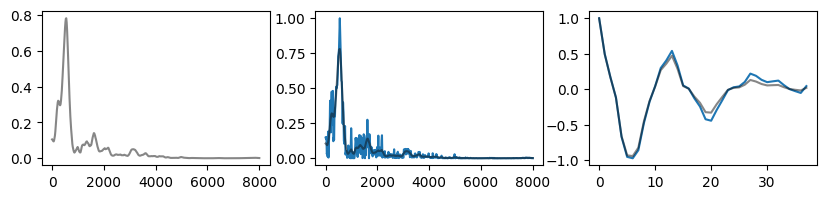

In [157]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_203_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



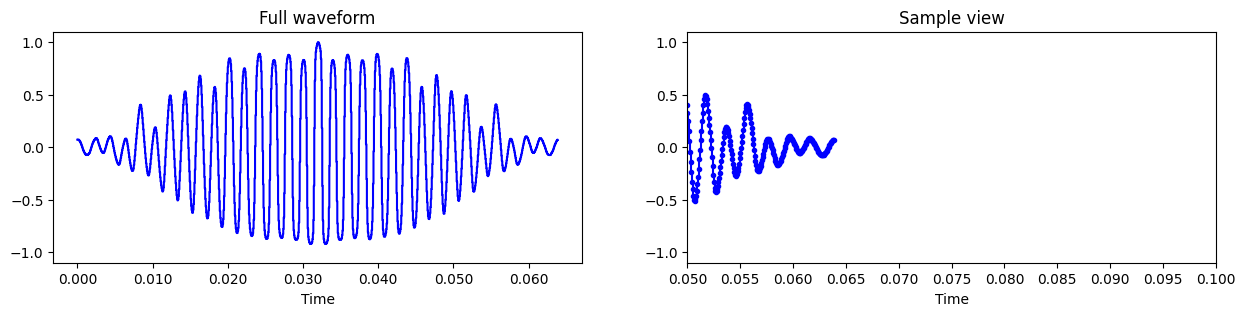

pitch: 500.0 Hz - Note: B4


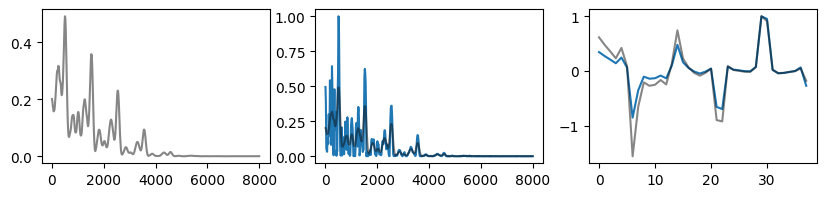

In [158]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_225_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



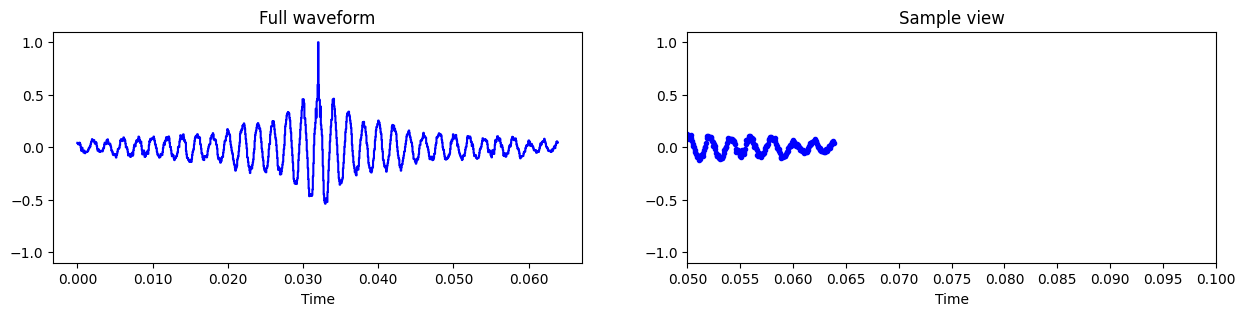

pitch: 500.0 Hz - Note: B4


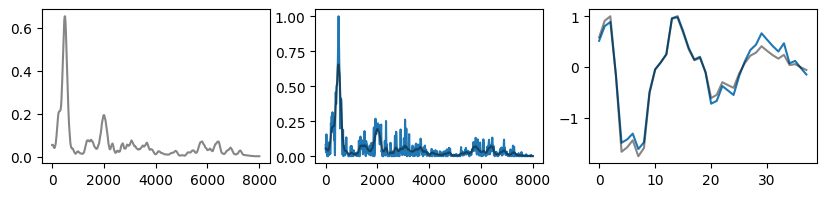

In [159]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_228_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



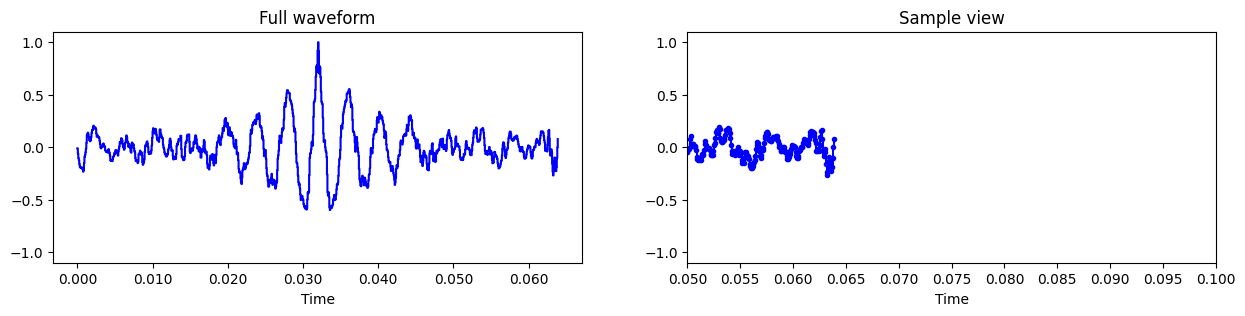

pitch: 234.375 Hz - Note: A♯3


AssertionError: 250.0

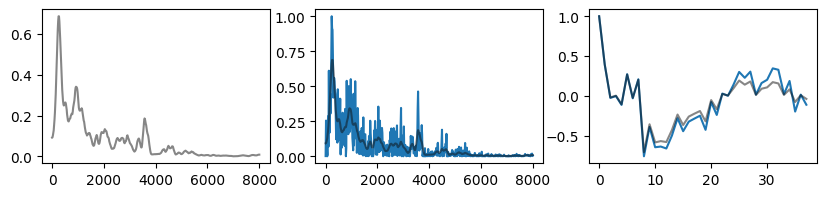

In [160]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_300_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



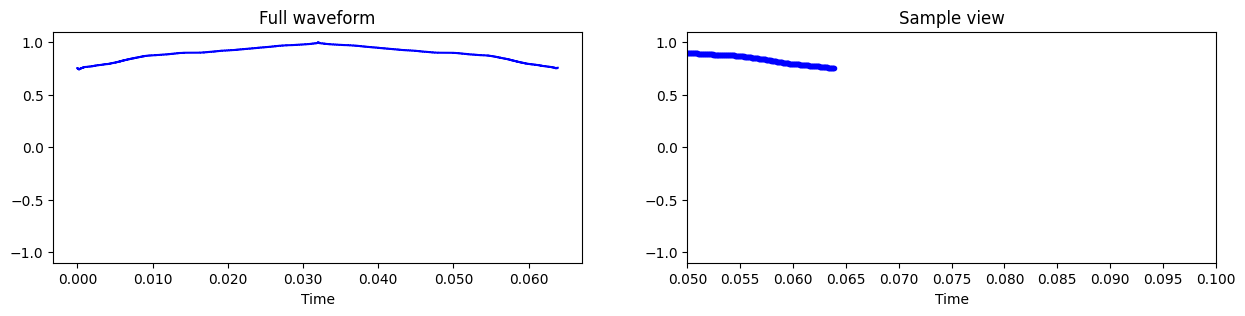

OverflowError: cannot convert float infinity to integer

In [161]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_46_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



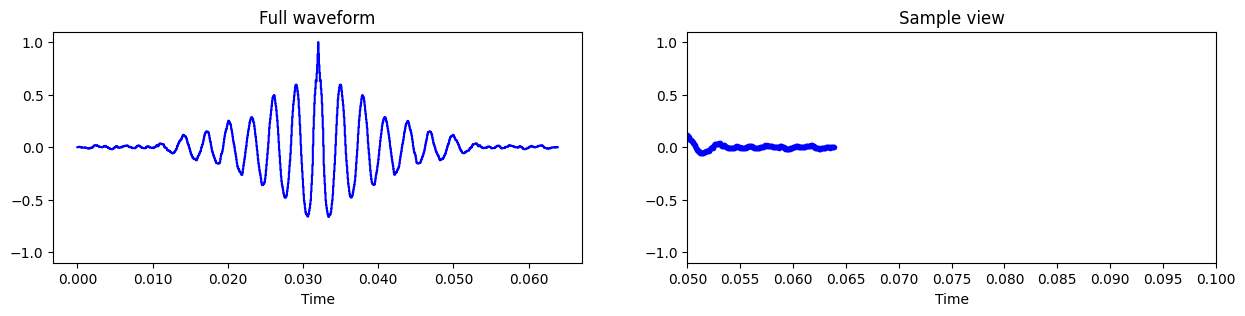

pitch: 343.75 Hz - Note: F4


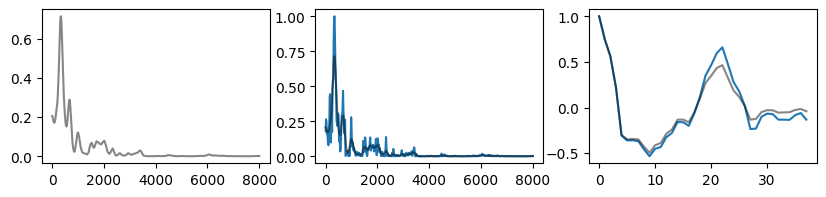

In [162]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_52_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



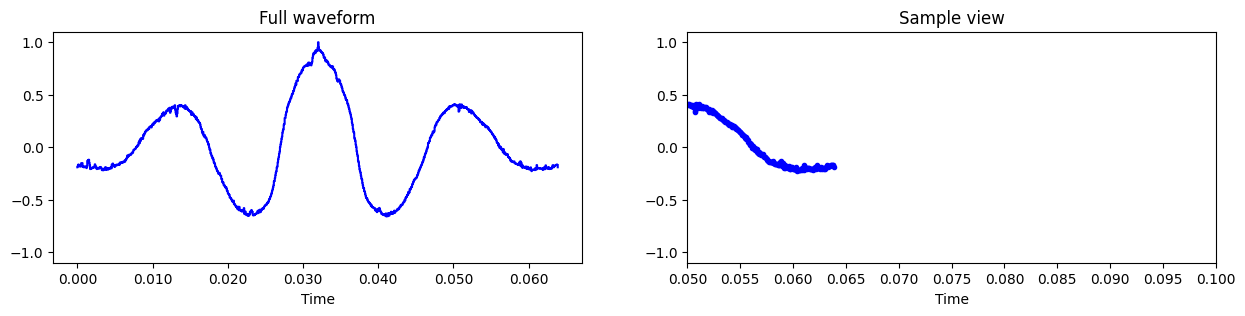

pitch: 46.875 Hz - Note: F♯1


AssertionError: 15.625

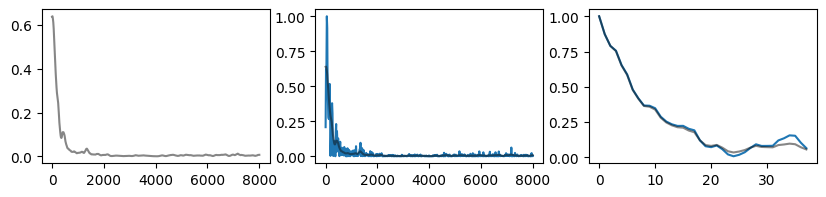

In [163]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_133_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

16000 (1023,)



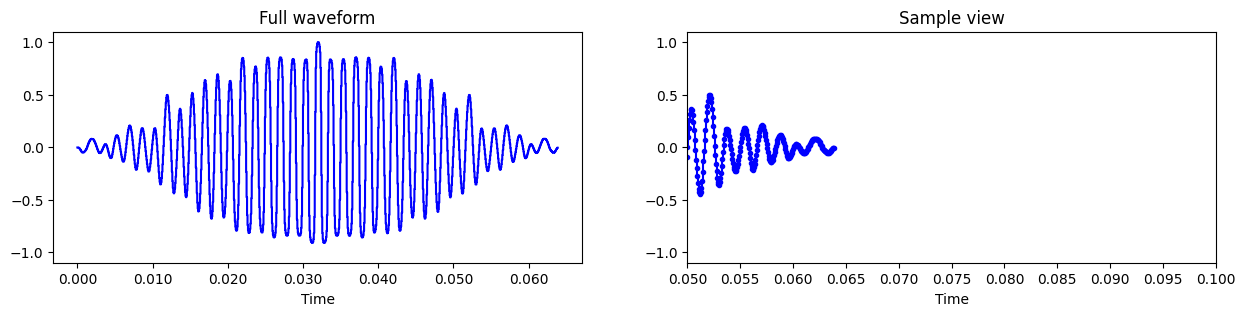

pitch: 593.75 Hz - Note: D5


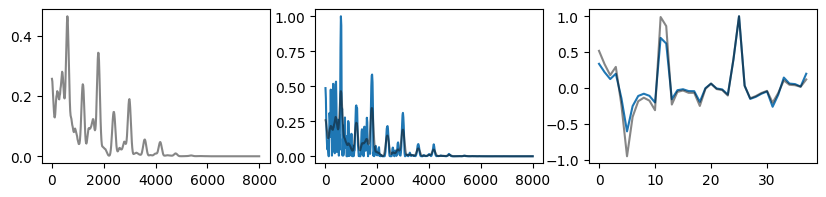

In [164]:
yy, sr = sf.read(f'{scb7_audio_dir}emb_169_iemocap4k.wav')
print(sr, yy.shape)
p = play_and_visualize(y=yy, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(yy))

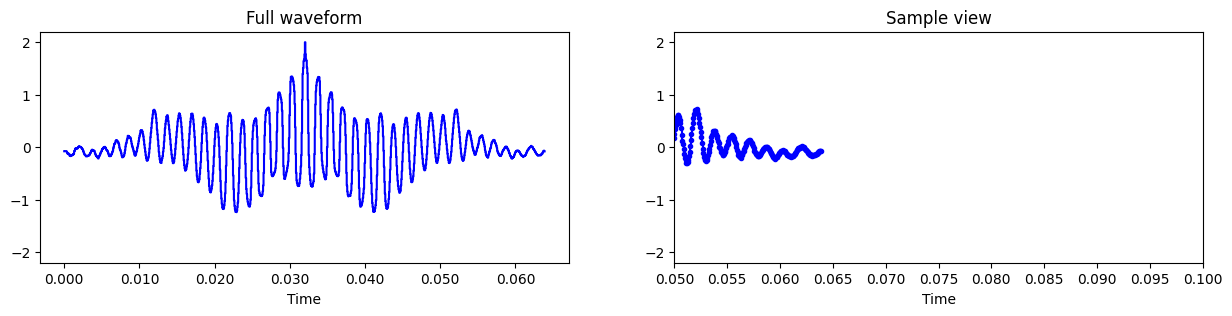

pitch: 593.75 Hz - Note: D5


AssertionError: 578.125

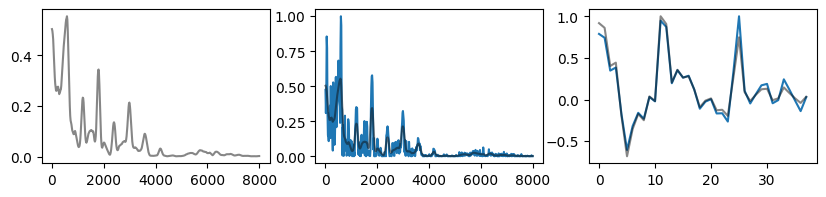

In [166]:
noise1, _ = sf.read(f'{scb7_audio_dir}emb_228_iemocap4k.wav')
noise2, _ = sf.read(f'{scb7_audio_dir}emb_133_iemocap4k.wav')
voice, sr = sf.read(f'{scb7_audio_dir}emb_169_iemocap4k.wav')
voice_tampered = voice + 0.5*noise1 + 0.5*noise2

p = play_and_visualize(y=voice_tampered, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(voice_tampered))

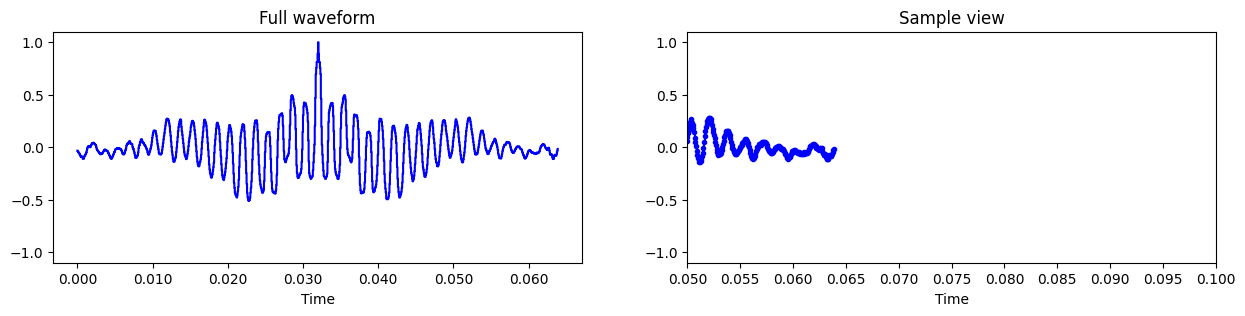

pitch: 593.75 Hz - Note: D5


AssertionError: 578.125

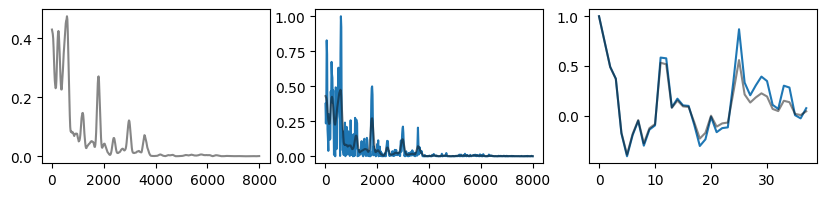

In [169]:
noise1, _ = sf.read(f'{scb7_audio_dir}emb_228_iemocap4k.wav')
noise2, _ = sf.read(f'{scb7_audio_dir}emb_133_iemocap4k.wav')
noise3, _ = sf.read(f'{scb7_audio_dir}emb_300_iemocap4k.wav')
voice, sr = sf.read(f'{scb7_audio_dir}emb_169_iemocap4k.wav')
voice_tampered2 = voice + 0.5*noise1 + 0.5*noise2 + 0.5*noise3
voice_tampered2 = voice_tampered2 / voice_tampered2.max()

p = play_and_visualize(y=voice_tampered2, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(voice_tampered2))

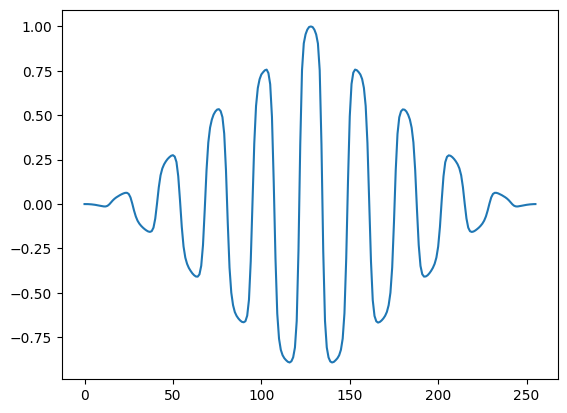

In [173]:
a = voice[512-128:512+128]
a = torch.tensor(a) * torch.hann_window(256)
plt.plot(a)

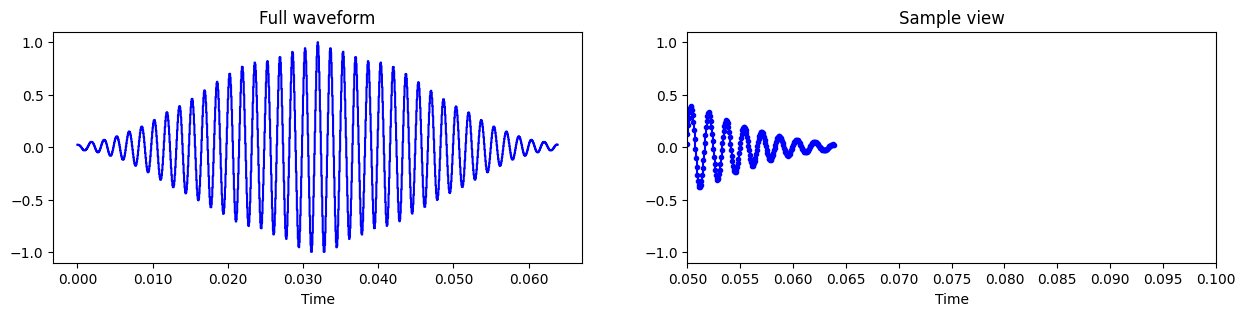

pitch: 593.75 Hz - Note: D5


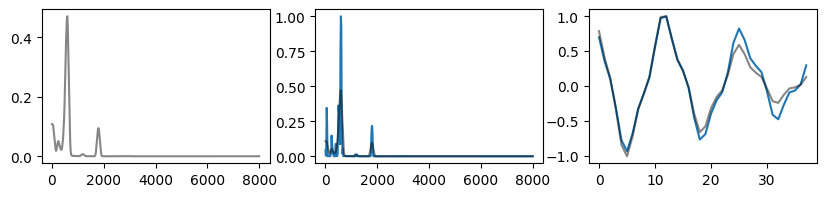

In [175]:
voice_tampered3 = F.conv1d(
    torch.tensor(voice_tampered2)[None,None,:], a[None,None,:], padding='same'
    ).squeeze().numpy()
voice_tampered3 = voice_tampered3 / voice_tampered3.max()

p = play_and_visualize(y=voice_tampered3, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(voice_tampered3))

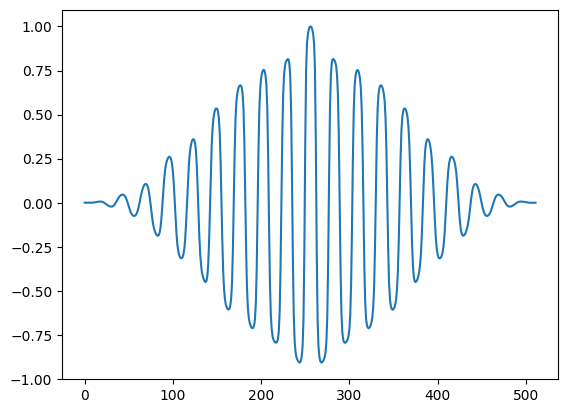

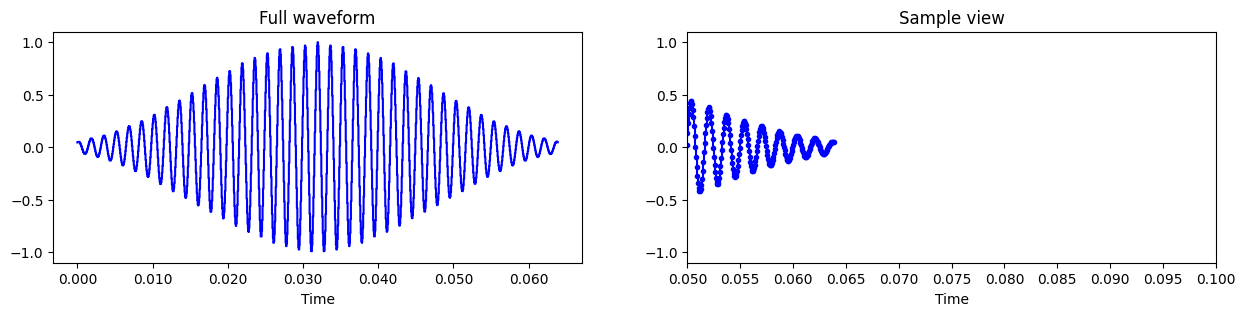

pitch: 593.75 Hz - Note: D5


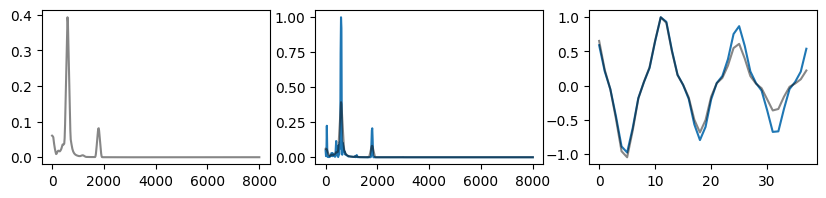

In [176]:
b = voice[512-256:512+256]
b = torch.tensor(b) * torch.hann_window(512)
plt.plot(b)
voice_tampered4 = F.conv1d(
    torch.tensor(voice_tampered2)[None,None,:], b[None,None,:], padding='same'
    ).squeeze().numpy()
voice_tampered4 = voice_tampered4 / voice_tampered4.max()

p = play_and_visualize(y=voice_tampered4, sr=16000)
ipd.display(p)
embedding_analysis2(torch.tensor(voice_tampered4))

In [499]:
import collections

In [501]:
SpeechSegmentFeatures = collections.namedtuple(
    "SpeechSegmentFeatures", 
    ["wave", "pitch", "note", 
     "fft", "fft_smooth", 
     "fft2", "fft2_smooth", 
     "fft3", "fft3_smooth"])

In [502]:
def embedding_analysis3(
    embedding, n_fft=512, sr=16000, 
    fmax=6000, fmin=30
) -> SpeechSegmentFeatures:
    max_freq = sr/2
    freq_delta = max_freq/n_fft
    fmax_fft = int(fmax / freq_delta) + 1
    fmin_fft = int(fmin / freq_delta)
    
    pitch = compute_pitch(embedding)
    note = librosa.hz_to_note(pitch)
    print(f"pitch: {pitch} Hz - Note: {note}")

    eps = torch.finfo(embedding.dtype).eps
    normalize_fn = lambda x: x / torch.clamp(
        x.abs().amax(dim=-1, keepdim=True), min=eps)
    
    fft_db = nl_relu(torch.fft.rfft(
        embedding, n=n_fft*2).real**2)[1:n_fft+1]
    fft_db = normalize_fn(fft_db)

    smooth_fn = lambda x, kz: F.avg_pool1d(
        F.pad(x, (kz//2,kz//2), 'reflect'), kernel_size=kz, stride=1)
    fft_db_smooth = smooth_fn(smooth_fn(
        fft_db.unsqueeze(dim=0), kz=7), kz=7).squeeze()[:n_fft]

    mfcc = torch.fft.rfft(fft_db, n=n_fft).real[2:40]
    mfcc = normalize_fn(mfcc)
    mfcc_smooth = smooth_fn(smooth_fn(
        mfcc.unsqueeze(dim=0), kz=3), kz=3).squeeze()
    n_mfcc = np.arange(2,40)

    mfcc_fft = torch.fft.rfft(mfcc).real[1:10]
    mfcc_fft_mag = normalize_fn(nl_relu(mfcc_fft**2))
    mfcc_fft = normalize_fn(mfcc_fft)
    n_mfcc_fft = np.arange(1,10)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,2))
    freq_x = np.linspace(0, max_freq, n_fft+1)
    n = len(embedding)
    d = n//3
    times_ticks_positions = [0, d, 2*d, len(embedding)]
    times_ticks_labels = np.linspace(0, len(embedding)/sr*1000, num=4, dtype=int)
    ax1.plot(embedding, color='b')
    ax1.set_xticks(times_ticks_positions, times_ticks_labels)
    ax1.set_title("Waveform")
    ax1.set_xlabel("Time (ms)")
    
    ax2.plot(freq_x[1:], fft_db)
    ax2.plot(freq_x[1:], fft_db_smooth, color='r')
    ax2.set_xlim(freq_x[fmin_fft],freq_x[fmax_fft])
    ax2.axvline(pitch, linestyle='dotted', linewidth=3, color='#83ffffd9', label=f"Pitch: {note}")
    pitch_after_smooth = (torch.argmax(fft_db_smooth)+1)*freq_delta
    if pitch_after_smooth == pitch:
        eq = "="
    else:
        eq = "≈"
    pitch_label = f"F0 {eq} {pitch:.0f} Hz ({note})"
    ax2.text(2500, 0.9, pitch_label, rotation=0, fontsize=9)
    ax2.set_title("Log-FFT magnitude")
    ax2.set_xlabel("Frequency (Hz)")
    
    ax3.plot(n_mfcc, mfcc)
    ax3.plot(n_mfcc, mfcc_smooth, color='#0f0f0f80')
    ax3.set_title("MFCC & smooth")
    ax3.set_xlabel("Cycle (times)")

    n = len(mfcc)
    d = n/6
    ticks_positions = np.arange(7)*d
    ticks_labels = np.linspace(2, 40, num=7, dtype=int, endpoint=True)
    ax3.set_xticks(ticks_positions, ticks_labels)
    
    ax4.plot(n_mfcc_fft, mfcc_fft)
    ax4.plot(n_mfcc_fft, mfcc_fft_mag, color='#0f0f0f80')
    ax4.set_title("MFCC FFT & log mag.")
    ax4.set_xlabel("Cycle (times)")

    n = len(mfcc)
    d = n/5
    ticks_positions = np.arange(6)*d
    ticks_labels = np.linspace(1, 10, num=6, dtype=int, endpoint=True)
    ax4.set_xticks(n_mfcc_fft, n_mfcc_fft)

    return SpeechSegmentFeatures(
        wave=embedding,
        pitch=pitch,
        note=note,
        fft=fft_db,
        fft_smooth=fft_db_smooth,
        fft2=mfcc,
        fft2_smooth=mfcc_smooth,
        fft3=mfcc_fft,
        fft3_smooth=mfcc_fft_mag
    )

pitch: 593.75 Hz - Note: D5


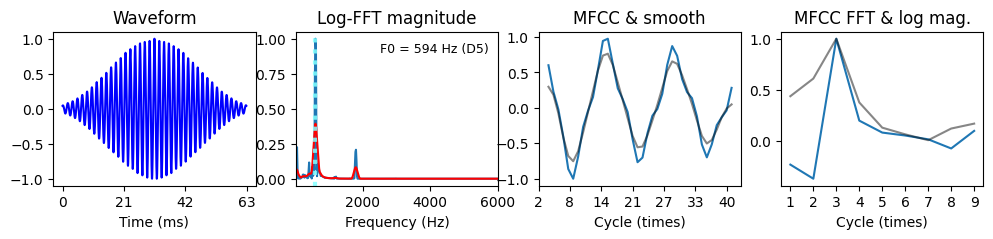

In [503]:
obj_voice_tampered4 = embedding_analysis3(torch.tensor(voice_tampered4))

pitch: 593.75 Hz - Note: D5


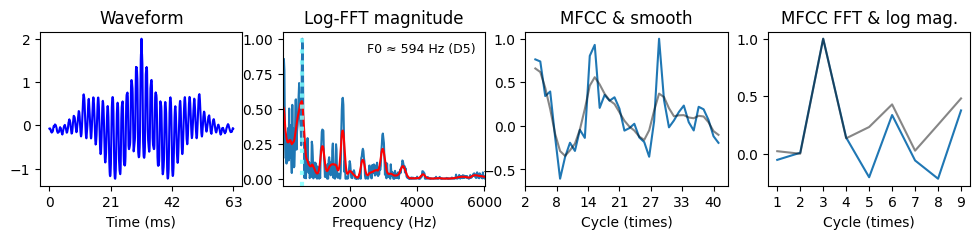

In [504]:
obj_voice_tampered = embedding_analysis3(torch.tensor(voice_tampered))

pitch: 593.75 Hz - Note: D5


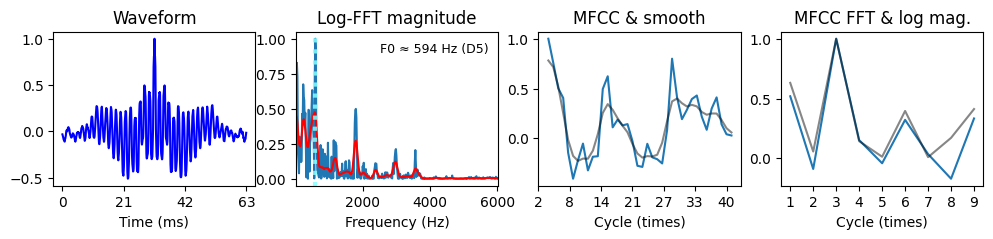

In [505]:
obj_voice_tampered2 = embedding_analysis3(torch.tensor(voice_tampered2))

pitch: 593.75 Hz - Note: D5


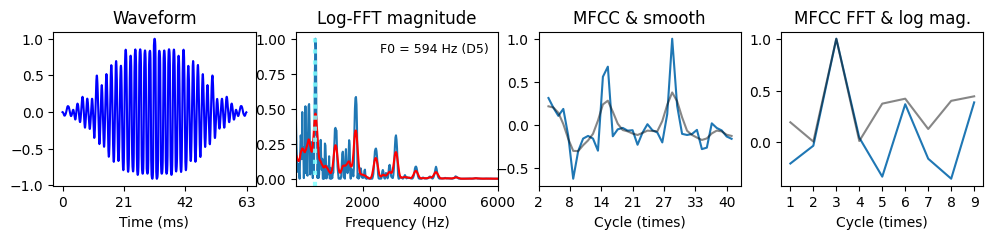

In [506]:
obj_voice = embedding_analysis3(torch.tensor(voice))

pitch: 500.0 Hz - Note: B4


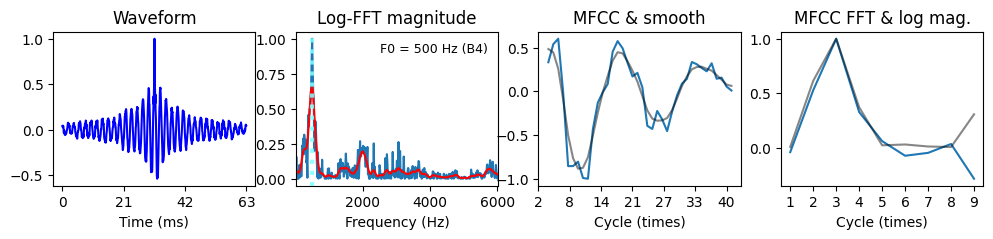

In [507]:
obj_noise1 = embedding_analysis3(torch.tensor(noise1))

pitch: 46.875 Hz - Note: F♯1


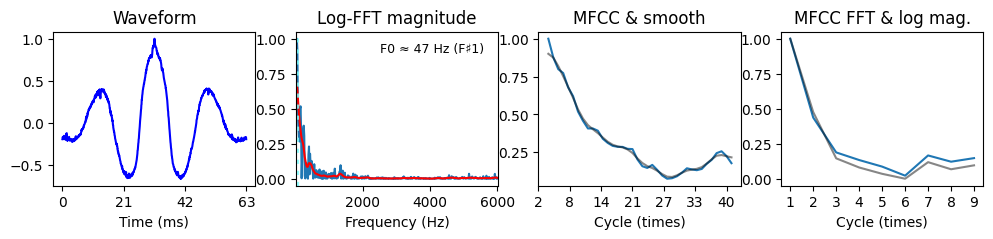

In [508]:
obj_noise2 = embedding_analysis3(torch.tensor(noise2))

pitch: 234.375 Hz - Note: A♯3


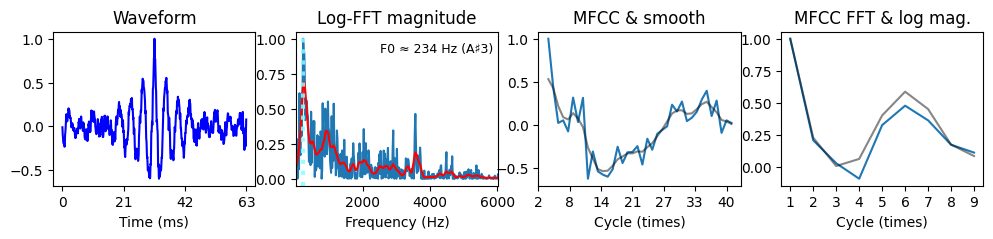

In [509]:
obj_noise3 = embedding_analysis3(torch.tensor(noise3))

In [548]:
def smooth_l1_loss(obj1: SpeechSegmentFeatures, obj2: SpeechSegmentFeatures):
    w = F.smooth_l1_loss(obj1.wave, obj2.wave).item()
    fft = F.smooth_l1_loss(obj1.fft, obj2.fft).item()
    fft2 = F.smooth_l1_loss(obj1.fft2, obj2.fft2).item()
    fft3 = F.smooth_l1_loss(obj1.fft3, obj2.fft3).item()
    print(f'wave: {w:.5f} \tfft: {fft:.5f} \tfft2: {fft2:.5f} \tfft3: {fft3:.5f}')

    fft = F.smooth_l1_loss(obj1.fft_smooth, obj2.fft_smooth).item()
    fft2 = F.smooth_l1_loss(obj1.fft2_smooth, obj2.fft2_smooth).item()
    fft3 = F.smooth_l1_loss(obj1.fft3_smooth, obj2.fft3_smooth).item()
    print(f'Smooth: \tfft: {fft:.5f} \tfft2: {fft2:.5f} \tfft3: {fft3:.5f}')

    print(f'Pitch: |{obj1.pitch:4.0f} - {obj2.pitch:4.0f}| = {np.abs(obj1.pitch-obj2.pitch):4.0f} Hz')

In [549]:
smooth_l1_loss(obj_voice, obj_voice_tampered)

wave: 0.02427 	fft: 0.00266 	fft2: 0.02533 	fft3: 0.00446
Smooth: 	fft: 0.00130 	fft2: 0.02153 	fft3: 0.00539
Pitch: | 594 -  594| =    0 Hz


In [550]:
smooth_l1_loss(obj_voice, obj_voice_tampered2)

wave: 0.04478 	fft: 0.00402 	fft2: 0.03886 	fft3: 0.03878
Smooth: 	fft: 0.00119 	fft2: 0.03121 	fft3: 0.02274
Pitch: | 594 -  594| =    0 Hz


In [551]:
smooth_l1_loss(obj_voice, obj_voice_tampered4)

wave: 0.01071 	fft: 0.00483 	fft2: 0.07741 	fft3: 0.03322
Smooth: 	fft: 0.00265 	fft2: 0.04787 	fft3: 0.05074
Pitch: | 594 -  594| =    0 Hz


In [552]:
smooth_l1_loss(obj_voice, obj_noise3)

wave: 0.13080 	fft: 0.01231 	fft2: 0.09765 	fft3: 0.19430
Smooth: 	fft: 0.00433 	fft2: 0.05318 	fft3: 0.11129
Pitch: | 594 -  234| =  359 Hz


In [553]:
smooth_l1_loss(obj_voice_tampered4, obj_noise3)

wave: 0.11382 	fft: 0.01390 	fft2: 0.20627 	fft3: 0.18112
Smooth: 	fft: 0.00838 	fft2: 0.15667 	fft3: 0.11710
Pitch: | 594 -  234| =  359 Hz


pitch: 546.875 Hz - Note: C♯5


wave: 0.22167 	fft: 0.00980 	fft2: 0.08612 	fft3: 0.10844
Smooth: 	fft: 0.00238 	fft2: 0.02444 	fft3: 0.04468
Pitch: | 547 -  594| =   47 Hz


wave: 0.13989 	fft: 0.00973 	fft2: 0.08743 	fft3: 0.15828
Smooth: 	fft: 0.00351 	fft2: 0.04037 	fft3: 0.11008
Pitch: | 547 -  234| =  312 Hz


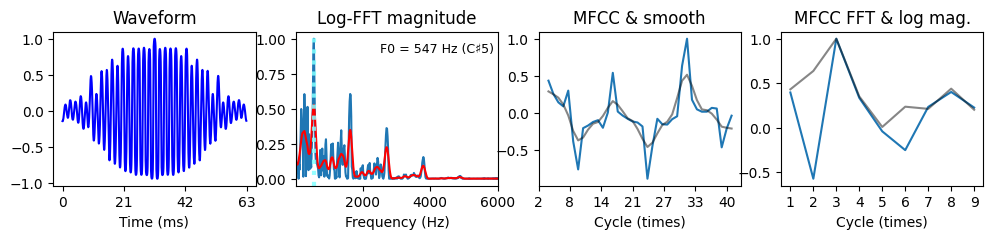

In [554]:
y, sr = sf.read(f'{scb7_audio_dir}emb_44.wav')
obj = embedding_analysis3(torch.tensor(y))
print('\n')
smooth_l1_loss(obj, obj_voice)
print('\n')
smooth_l1_loss(obj, obj_noise3)

pitch: 343.75 Hz - Note: F4


wave: 0.13253 	fft: 0.00852 	fft2: 0.07947 	fft3: 0.12349
Smooth: 	fft: 0.00324 	fft2: 0.04870 	fft3: 0.09189
Pitch: | 344 -  594| =  250 Hz


wave: 0.03686 	fft: 0.00770 	fft2: 0.06707 	fft3: 0.11773
Smooth: 	fft: 0.00311 	fft2: 0.04753 	fft3: 0.12401
Pitch: | 344 -  234| =  109 Hz


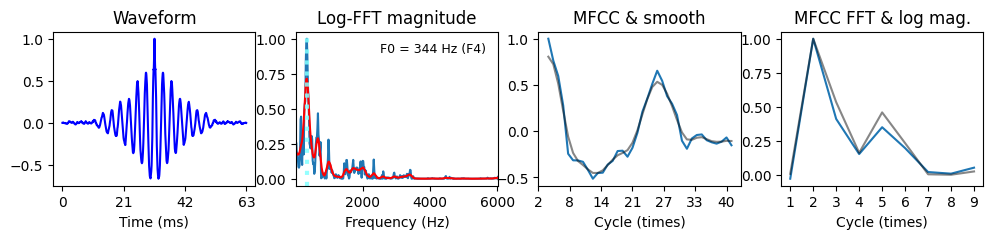

In [555]:
y, sr = sf.read(f'{scb7_audio_dir}emb_52_iemocap4k.wav')
obj1 = embedding_analysis3(torch.tensor(y))
print('\n')
smooth_l1_loss(obj1, obj_voice)
print('\n')
smooth_l1_loss(obj1, obj_noise3)

pitch: 562.5 Hz - Note: C♯5


wave: 0.19256 	fft: 0.00875 	fft2: 0.04339 	fft3: 0.02132
Smooth: 	fft: 0.00126 	fft2: 0.00544 	fft3: 0.02110
Pitch: | 562 -  594| =   31 Hz


wave: 0.13432 	fft: 0.01103 	fft2: 0.09287 	fft3: 0.22987
Smooth: 	fft: 0.00462 	fft2: 0.04979 	fft3: 0.14331
Pitch: | 562 -  234| =  328 Hz


wave: 0.13432 	fft: 0.01103 	fft2: 0.09287 	fft3: 0.22987
Smooth: 	fft: 0.00462 	fft2: 0.04979 	fft3: 0.14331
Pitch: | 562 -  234| =  328 Hz


wave: 0.19447 	fft: 0.00805 	fft2: 0.06202 	fft3: 0.12189
Smooth: 	fft: 0.00163 	fft2: 0.01326 	fft3: 0.03696
Pitch: | 562 -  547| =   16 Hz


wave: 0.13921 	fft: 0.00938 	fft2: 0.09350 	fft3: 0.18566
Smooth: 	fft: 0.00360 	fft2: 0.05991 	fft3: 0.08035
Pitch: | 562 -  344| =  219 Hz


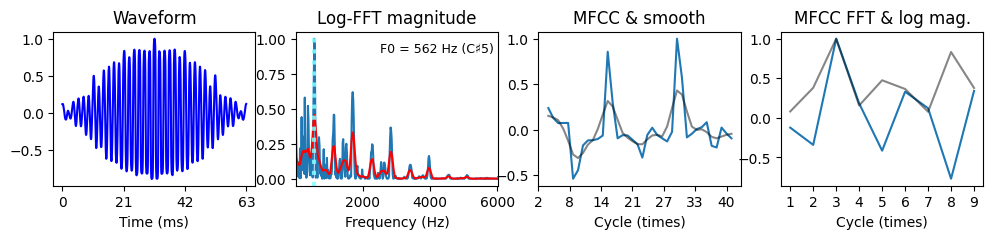

In [556]:
y, sr = sf.read(f'{scb7_audio_dir}emb_252_iemocap4k.wav')
obj2 = embedding_analysis3(torch.tensor(y))
print('\n')
smooth_l1_loss(obj2, obj_voice)
print('\n')
smooth_l1_loss(obj2, obj_noise3)
print('\n')
smooth_l1_loss(obj2, obj_noise3)
print('\n')
smooth_l1_loss(obj2, obj)
print('\n')
smooth_l1_loss(obj2, obj1)